<a href="https://colab.research.google.com/github/BRich823/misc/blob/main/CIS263_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The partition problem

The partition problem is intuitive: Given a collection of n objects, can we place part of those objects in the left hand of a balance and the remaining objects in the right hand side of a balance so that they weigh the same? In other (more mathematical) words, if we have a multiset of integers s, can we partition that multiset into two separate multisets q and r so that the sum of the elements in q is the same as the sum of the elements in r. A more formal statement of the problem can be found on mathworld.wolfram [here](https://mathworld.wolfram.com/NumberPartitioningProblem.html).

This simple problem belongs to a very unique kind of problems called NP-complete problems that are very hard to solve.
Given an instance of the partition problem with n positive integer values, one way to find if there is a solution to that instance is to examine each and every one of the $2^n$ subsets and to check for every one of those subsets if that subset and its complement are a solution to this instance of the partition problem. One adds up the elements in the subset, adds up the elements in the complement and if the two sums are the same, this is a solution to this instance of the partition problem.

The set of all the subsets of a set is called the power set.

Consider the following example: {2,3,5}. In this case n, the number of elements in the instance of the partition problem, is 3. If one calculates all the possible subsets, there are $2^3$ = 8 possible distinct subsets. The following table shows the eight subsets, their complements and indicates which of those subsets are solutions for this instance of the partition problem.

| Index | Binary Encoding | Elements | Elements in the Complement | Solution |
|:-------|:-----------------|:----------|:------------------------|:--------------|
| 0 |	000	| {}	| {2,3,5}	| No |
|1 |	001	|{2}	|{3,5}	|No
|2 |	010	|{3}	|{2,5}	|No
|3 |	011	|{2,3}	|{5}	|Yes
|4 |	100	|{5}	|{2,3}	|Yes
|5 |	101	|{2,5}	|{3}	|No
|6 |	110	|{3,5}	|{2}	|No
|7 |	111	|{2,3,5}	|{}	|No

Notice that the first half of the table is symmetrical to the second half of the table. Hence, one only needs to go through the first half of all the elements in the Power Set.

# The Power Set
The power set can be defined as:
"Given a set S, the power set of S, sometimes also called the powerset, is the set of all subsets of S. The order of a power set of a set of order n is 2^n. Power sets are larger than the sets associated with them. The power set of S is variously denoted 2^S or P(S)."

https://www.wolframalpha.com/input?i=POWER+SET

The partition problem can be solved by
calculating the power set of the multiset of integers
and then checking each and every one of the
possible subsets to see if it and its complement
are a solution to the instance of the partition problem.

In [1]:
#
# I learned about these libraries from Ian Curtis, a student in one of the sections
# of the HPC course during the fall of 2023
#
# Using itertools to calculate the PowerSet
#

from itertools import chain, combinations


def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))


example_list = [0,1,2]
powerset_of_example_list = powerset(example_list)
print("This is the power set of the set of [0,1,2]")
for s in powerset_of_example_list:
    print(s)

This is the power set of the set of [0,1,2]
()
(0,)
(1,)
(2,)
(0, 1)
(0, 2)
(1, 2)
(0, 1, 2)


Let's create several test files to use later.

Some of these test files will be instances of the partition problem that have solutions.

Other test files will be instances of the partition problem that do not have a solution.

The format of the test files is as follows:
The first line contains the size of the multiset, how many integers there are.
The second line contains the actual multiset.

Let's start with the test files with solutions.

In [2]:
%%writefile with_solution_20.Text
20
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 19

Writing with_solution_20.Text


In [3]:
%%writefile with_solution_21.Text
21
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 20

Writing with_solution_21.Text


In [4]:
%%writefile with_solution_22.Text
22
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 21

Writing with_solution_22.Text


In [5]:
%%writefile with_solution_23.Text
23
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 22

Writing with_solution_23.Text


Now, the instances that do not have solutions.

In [6]:
%%writefile no_solution_20.Text
20
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 21

Writing no_solution_20.Text


In [7]:
%%writefile no_solution_21.Text
21
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 22

Writing no_solution_21.Text


In [8]:
%%writefile no_solution_22.Text
22
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 23

Writing no_solution_22.Text


In [9]:
%%writefile no_solution_23.Text
23
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 24

Writing no_solution_23.Text


Now the code. The program will time its execution.
It will print a possible solution and it will print how long did it take to find the solution.

In [10]:
%%writefile partition.py
#
# Program to solve the partition problem
# The program assumes that input redirection
# can be used in COLAB
from itertools import chain, combinations
import time

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

#
# The assumed format of the test file is:
# - one line with a positive integer that contains the number of positive integers
# in the instance
# - A line with the list of values
#

start = time.time()
# Read the problem
n = int(input())
valuesString = input()
values = valuesString.split()
for i in range(len(values)):
  values[i] = int(values[i])
# Print the instance of the problem
print("Problem size: ",n)
print("Problem instance: ",values)

sum_of_numbers = sum(values)
if sum_of_numbers % 2 == 1:
  print("This instance does not have a solution")
else:
  power_set = powerset(values)
  solution_found = False
  for set in power_set:
    if sum(set) == (sum_of_numbers//2):
      print("Solution found!")
      print("One partition contains: ",set)
      solution_found = True
      break
  if solution_found == False:
    print("This instance does not have a solution")

end = time.time()
elapsed = end - start
print("The program took: ",elapsed," seconds.")
print("--------------------------------------")

Writing partition.py


Let's check the execution times for the instances with a solution.

In [11]:
!python partition.py < with_solution_20.Text
!python partition.py < with_solution_21.Text
!python partition.py < with_solution_22.Text
!python partition.py < with_solution_23.Text

Problem size:  20
Problem instance:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 19]
Solution found!
One partition contains:  (19,)
The program took:  0.00014734268188476562  seconds.
--------------------------------------
Problem size:  21
Problem instance:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 20]
Solution found!
One partition contains:  (20,)
The program took:  0.00014638900756835938  seconds.
--------------------------------------
Problem size:  22
Problem instance:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 21]
Solution found!
One partition contains:  (21,)
The program took:  0.00014591217041015625  seconds.
--------------------------------------
Problem size:  23
Problem instance:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 22]
Solution found!
One partition contains:  (22,)
The program took:  0.00014662742614746094  seconds.
--------------------------------------


Now let's check the execution times for the instances with no solution.


In [12]:
!python partition.py < no_solution_20.Text
!python partition.py < no_solution_21.Text
!python partition.py < no_solution_22.Text
!python partition.py < no_solution_23.Text

Problem size:  20
Problem instance:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 21]
This instance does not have a solution
The program took:  0.3425900936126709  seconds.
--------------------------------------
Problem size:  21
Problem instance:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 22]
This instance does not have a solution
The program took:  0.6812427043914795  seconds.
--------------------------------------
Problem size:  22
Problem instance:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 23]
This instance does not have a solution
The program took:  1.3293302059173584  seconds.
--------------------------------------
Problem size:  23
Problem instance:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 24]
This instance does not have a solution
The program took:  2.714885950088501  seconds.
--------------------------------------


# Profiling
Now, let's use line profiling to see where the execution time is being spent.

Install the line profiling library line_profiler

In [13]:
!pip install line_profiler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.2/750.2 kB 43.6 MB/s eta 0:00:00


The code below is functionally the same as the previous code, but it has modified to profile the code that is looking for a solution by going through all the elements in the power set.

In [14]:
%%writefile partition_profile.py
#
# Program to solve the partition problem
# The program assumes that input redirection
# can be used in COLAB
from itertools import chain, combinations
import time

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

#
# The assumed format of the test file is:
# - one line with a positive integer that contains the number of positive integers
# in the instance
# - A line with the list of values
#

@profile
def partition():
  start_time = time.time()
  # Read the problem
  n = int(input())
  valuesString = input()
  values = valuesString.split()
  for i in range(len(values)):
    values[i] = int(values[i])
  # Print the instance of the problem
  print("Problem size: ",n)
  print("Problem instance: ",values)

  sum_of_numbers = sum(values)
  if sum_of_numbers % 2 == 1:
    print("This instance does not have a solution")
  else:
    power_set = powerset(values)
    solution_found = False
    for set in power_set:
      if sum(set) == (sum_of_numbers//2):
        print("Solution found!")
        print("One partition contains: ",set)
        solution_found = True
        break
    if solution_found == False:
      print("This instance does not have a solution")

  end_time = time.time()
  elapsed_time = end_time - start_time
  print("The program took: ",elapsed_time," seconds.")

if __name__ == "__main__":
  partition()

Writing partition_profile.py


Now, let's profile the execution of the test files with a solution.

The key lines to examine are lines 39 and 40.
The code has written so that as soon as a solution has been found, the program
stops looking for other solutions.

In [16]:
!kernprof -l partition_profile.py < with_solution_20.Text

Problem size:  20
Problem instance:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 19]
Solution found!
One partition contains:  (19,)
The program took:  0.0002677440643310547  seconds.
Wrote profile results to partition_profile.py.lprof
Inspect results with:
python3 -m line_profiler -rmt "partition_profile.py.lprof"


In [17]:
!python3 -m line_profiler -rmt "partition_profile.py.lprof"

Timer unit: 1e-06 s

Total time: 0.000233474 s
File: partition_profile.py
Function: partition at line 20

Line #      Hits         Time  Per Hit   % Time  Line Contents
    20                                           @profile                                           
    21                                           def partition():                                   
    22         1          3.1      3.1      1.3    start_time = time.time()                         
    23                                             # Read the problem                               
    24         1         37.7     37.7     16.2    n = int(input())                                 
    25         1          2.2      2.2      0.9    valuesString = input()                           
    26         1          2.4      2.4      1.0    values = valuesString.split()                    
    27        21         13.4      0.6      5.7    for i in range(len(values)):                     
    28        20       

In [18]:
!kernprof -l partition_profile.py < with_solution_21.Text

Problem size:  21
Problem instance:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 20]
Solution found!
One partition contains:  (20,)
The program took:  0.0002951622009277344  seconds.
Wrote profile results to partition_profile.py.lprof
Inspect results with:
python3 -m line_profiler -rmt "partition_profile.py.lprof"


In [19]:
!python3 -m line_profiler -rmt "partition_profile.py.lprof"

Timer unit: 1e-06 s

Total time: 0.000249747 s
File: partition_profile.py
Function: partition at line 20

Line #      Hits         Time  Per Hit   % Time  Line Contents
    20                                           @profile                                           
    21                                           def partition():                                   
    22         1          4.2      4.2      1.7    start_time = time.time()                         
    23                                             # Read the problem                               
    24         1         42.9     42.9     17.2    n = int(input())                                 
    25         1          2.8      2.8      1.1    valuesString = input()                           
    26         1          2.6      2.6      1.1    values = valuesString.split()                    
    27        22          9.8      0.4      3.9    for i in range(len(values)):                     
    28        21       

In [20]:
!kernprof -l partition_profile.py < with_solution_22.Text


Problem size:  22
Problem instance:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 21]
Solution found!
One partition contains:  (21,)
The program took:  0.0002560615539550781  seconds.
Wrote profile results to partition_profile.py.lprof
Inspect results with:
python3 -m line_profiler -rmt "partition_profile.py.lprof"


In [21]:
!python3 -m line_profiler -rmt "partition_profile.py.lprof"

Timer unit: 1e-06 s

Total time: 0.000217937 s
File: partition_profile.py
Function: partition at line 20

Line #      Hits         Time  Per Hit   % Time  Line Contents
    20                                           @profile                                           
    21                                           def partition():                                   
    22         1          2.2      2.2      1.0    start_time = time.time()                         
    23                                             # Read the problem                               
    24         1         54.4     54.4     25.0    n = int(input())                                 
    25         1          3.4      3.4      1.5    valuesString = input()                           
    26         1          3.0      3.0      1.4    values = valuesString.split()                    
    27        23         10.1      0.4      4.6    for i in range(len(values)):                     
    28        22       

In [22]:
!kernprof -l partition_profile.py < with_solution_23.Text

Problem size:  23
Problem instance:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 22]
Solution found!
One partition contains:  (22,)
The program took:  0.00031113624572753906  seconds.
Wrote profile results to partition_profile.py.lprof
Inspect results with:
python3 -m line_profiler -rmt "partition_profile.py.lprof"


In [23]:
!python3 -m line_profiler -rmt "partition_profile.py.lprof"

Timer unit: 1e-06 s

Total time: 0.000265853 s
File: partition_profile.py
Function: partition at line 20

Line #      Hits         Time  Per Hit   % Time  Line Contents
    20                                           @profile                                           
    21                                           def partition():                                   
    22         1          3.9      3.9      1.5    start_time = time.time()                         
    23                                             # Read the problem                               
    24         1         48.7     48.7     18.3    n = int(input())                                 
    25         1          3.6      3.6      1.4    valuesString = input()                           
    26         1          3.4      3.4      1.3    values = valuesString.split()                    
    27        24         12.3      0.5      4.6    for i in range(len(values)):                     
    28        23       

The behavior of the program on the instances with no solution will be very different. The program needs to examine the entire Powerset and it can state that there is no solution only after examining the entire Powerset.


In [24]:
!kernprof -l partition_profile.py < no_solution_20.Text

Problem size:  20
Problem instance:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 21]
This instance does not have a solution
The program took:  1.5768139362335205  seconds.
Wrote profile results to partition_profile.py.lprof
Inspect results with:
python3 -m line_profiler -rmt "partition_profile.py.lprof"


In [25]:
!python3 -m line_profiler -rmt "partition_profile.py.lprof"

Timer unit: 1e-06 s

Total time: 0.834947 s
File: partition_profile.py
Function: partition at line 20

Line #      Hits         Time  Per Hit   % Time  Line Contents
    20                                           @profile                                           
    21                                           def partition():                                   
    22         1          3.7      3.7      0.0    start_time = time.time()                         
    23                                             # Read the problem                               
    24         1         41.1     41.1      0.0    n = int(input())                                 
    25         1          2.2      2.2      0.0    valuesString = input()                           
    26         1          2.4      2.4      0.0    values = valuesString.split()                    
    27        21          8.2      0.4      0.0    for i in range(len(values)):                     
    28        20         1

In [26]:
!kernprof -l partition_profile.py < no_solution_21.Text

Problem size:  21
Problem instance:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 22]
This instance does not have a solution
The program took:  3.1661436557769775  seconds.
Wrote profile results to partition_profile.py.lprof
Inspect results with:
python3 -m line_profiler -rmt "partition_profile.py.lprof"


In [27]:
!python3 -m line_profiler -rmt "partition_profile.py.lprof"

Timer unit: 1e-06 s

Total time: 1.68377 s
File: partition_profile.py
Function: partition at line 20

Line #      Hits         Time  Per Hit   % Time  Line Contents
    20                                           @profile                                           
    21                                           def partition():                                   
    22         1          3.4      3.4      0.0    start_time = time.time()                         
    23                                             # Read the problem                               
    24         1         47.7     47.7      0.0    n = int(input())                                 
    25         1          2.2      2.2      0.0    valuesString = input()                           
    26         1          3.2      3.2      0.0    values = valuesString.split()                    
    27        22          8.4      0.4      0.0    for i in range(len(values)):                     
    28        21         13

In [28]:
!kernprof -l partition_profile.py < no_solution_22.Text

Problem size:  22
Problem instance:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 23]
This instance does not have a solution
The program took:  7.010106086730957  seconds.
Wrote profile results to partition_profile.py.lprof
Inspect results with:
python3 -m line_profiler -rmt "partition_profile.py.lprof"


In [29]:
!python3 -m line_profiler -rmt "partition_profile.py.lprof"

Timer unit: 1e-06 s

Total time: 3.75876 s
File: partition_profile.py
Function: partition at line 20

Line #      Hits         Time  Per Hit   % Time  Line Contents
    20                                           @profile                                           
    21                                           def partition():                                   
    22         1          3.3      3.3      0.0    start_time = time.time()                         
    23                                             # Read the problem                               
    24         1         43.1     43.1      0.0    n = int(input())                                 
    25         1          2.9      2.9      0.0    valuesString = input()                           
    26         1          2.9      2.9      0.0    values = valuesString.split()                    
    27        23         11.7      0.5      0.0    for i in range(len(values)):                     
    28        22         21

In [30]:
!kernprof -l partition_profile.py < no_solution_23.Text

Problem size:  23
Problem instance:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 24]
This instance does not have a solution
The program took:  13.852470636367798  seconds.
Wrote profile results to partition_profile.py.lprof
Inspect results with:
python3 -m line_profiler -rmt "partition_profile.py.lprof"


In [31]:
!python3 -m line_profiler -rmt "partition_profile.py.lprof"

Timer unit: 1e-06 s

Total time: 7.51285 s
File: partition_profile.py
Function: partition at line 20

Line #      Hits         Time  Per Hit   % Time  Line Contents
    20                                           @profile                                           
    21                                           def partition():                                   
    22         1          2.7      2.7      0.0    start_time = time.time()                         
    23                                             # Read the problem                               
    24         1         35.3     35.3      0.0    n = int(input())                                 
    25         1          2.2      2.2      0.0    valuesString = input()                           
    26         1          2.4      2.4      0.0    values = valuesString.split()                    
    27        24          8.0      0.3      0.0    for i in range(len(values)):                     
    28        23         13

Recall the python notebook that we looked at in class on January 9:
 https://github.com/trefftzc/cis263/blob/main/Profiling_matrix_multiplication.ipynb

 At the end you will find python code that can be used to produce plots.

 Add to your notebook, the following four plots:
 1. For the instances with a solution: On the x axis the size of the instance, on the y axis the execution time.
 2. For the instances with a solution: On the x axis the size of the instance, on the y axis the number of times that line 40 was executed in the program that was used for profiling
 3. For the instances with no solution: On the x axis the size of the instance, on the y axis the execution time.
 4. For the instances with no solution: On the x axis the size of the instance, on the y axis the number of times that line 40 was executed in the program that was used for profiling

 Notice that execution time and the number of times that certain instructions are executed depend on the kind of instance that the algorithm is solving.

 The big O notation requires us to be cautious, therefore we report the worst possible time.

Answer this question on your notebook.
 Let n be the size of the multiset. What is the growth rate for this algorithm?

 Submit, through Blackboard, the URL of your notebook. Do not forget to make sure that the notebook has been shared with anybody with the URL.

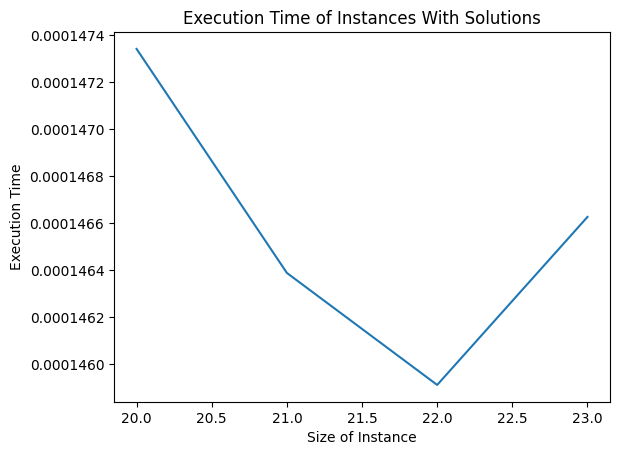

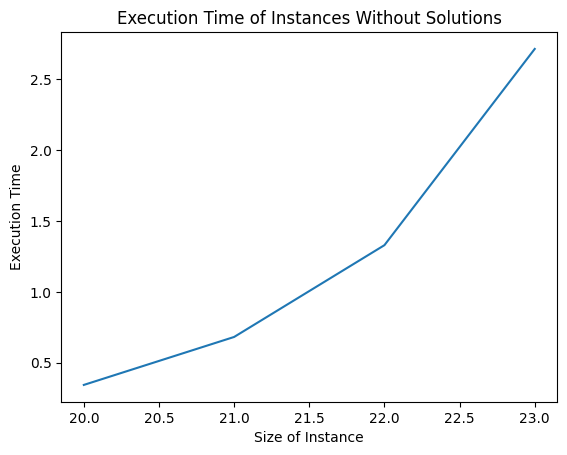

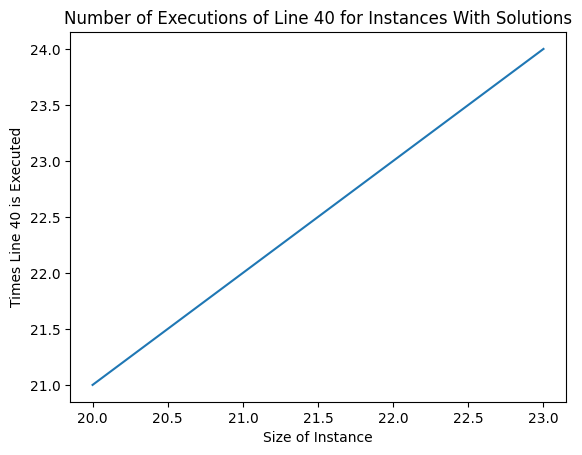

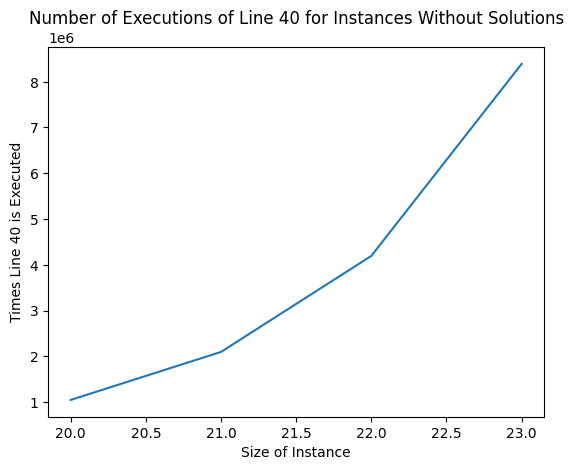

In [37]:
import matplotlib.pyplot as plt

def plot(y, label, title):
  n = [20, 21, 22, 23]
  plt.plot(n, y)
  plt.xlabel("Size of Instance")
  plt.ylabel(label)
  plt.title(title)
  plt.show()

if __name__ == "__main__":
  sol_time = [0.00014734268188476562, 0.00014638900756835938, 0.00014591217041015625, 0.00014662742614746094]
  nsol_time = [0.3425900936126709, 0.6812427043914795, 1.3293302059173584, 2.714885950088501]
  sol_hits = [21, 22, 23, 24]
  nsol_hits = [1048576, 2097152, 4194304, 8388608]

  plot(sol_time, "Execution Time", "Execution Time of Instances With Solutions")
  plot(nsol_time, "Execution Time", "Execution Time of Instances Without Solutions")
  plot(sol_hits, "Times Line 40 is Executed", "Number of Executions of Line 40 for Instances With Solutions")
  plot(nsol_hits, "Times Line 40 is Executed", "Number of Executions of Line 40 for Instances Without Solutions")

The growth rate for this algorithm is O(n*2^n). you must iterate through 2^n number of subsets, twice (once when making the powerset and another while finding their sums). The subsets have an average length of n/2, so our time complexity would be O(2 * 2^n * n/2) or O(n*2^n).